**Student: C0904838, Haldo Somoza**

**Date: Ago 09, 2024**

GitHub Repository: https://github.com/haldosomoza/2024S-T3-AML-3104-.git

---
PROFESSOR INSTRUCTIONS: 

Assignment: Sentiment Analysis Using Recurrent Neural Networks (RNN) with IMDB Dataset.

Objective: The objective of this assignment is to implement a Recurrent Neural Network (RNN) using TensorFlow to perform sentiment analysis on the IMDB movie review dataset. You will train the RNN to classify movie reviews as positive or negative and analyze the model's performance.

---
### 1. Understanding Sentiment Analysis and RNNs:

Research and explain the basic concepts of sentiment analysis and Recurrent Neural Networks (RNNs).

- What is sentiment analysis and its applications?

Sentiment Analysis is the process of using Natural Language Processing (NLP), and others kinds of text/linguistics analysis to identify and extract subjective information from text databases, aiming to determine the sentiment expressed in those texts, whether them are positive, negative, neutral, and/or another preconcepted label.

Some applications for Sentiment Analysis are:
- Brand monitoring and reputation management.
- Social media analysis.
- Market research.
- Political analysis.
- Customer service improvement.

References: 
1. https://www.ibm.com/topics/sentiment-analysis 

2. https://careerfoundry.com/en/blog/data-analytics/sentiment-analysis/ 

- How RNNs differ from traditional feedforward neural networks.

Recurrent Neural Networks (RNNs) and Feedforward Neural Networks (FNNs) differ one from another in architecture and functionalities. The Feedforward Neural Networks is a very basic ANN, so the input data provided travels through the NN front-propagated until the output layer, having no feedback (backpropagation). By the other hand Recurrent Neural Networks provide one base architecture like FNN but adding mechanisms to feedback the previous layers giving to the neurons memory capacity to perform better some computational processes.  

Here some other differences between FNNs and RNNs:

| **Comparison Attribute**                 | **Feedforward Neural Networks (FNN)**                              | **Recurrent Neural Networks (RNN)**                                      |
|------------------------------------------|---------------------------------------------------------------|--------------------------------------------------------------------|
| **Signal flow direction**                | Forward only                                                  | Bidirectional                                                      |
| **Delay introduced**                     | No                                                            | Yes                                                                |
| **Complexity**                           | Low                                                           | High                                                               |
| **Neuron independence in the same layer**| Yes                                                           | No                                                                 |
| **Speed**                                | High                                                          | Slow                                                               |
| **Commonly used for**                    | Pattern recognition, speech recognition, and character recognition | Language translation, speech-to-text conversion, and robotic control |


References:

3. https://www.geeksforgeeks.org/difference-between-feed-forward-neural-networks-and-recurrent-neural-networks/

4. https://medium.com/@prajeeshprathap/feed-forward-and-recurrent-neural-networks-the-future-of-machine-learning-8b2c1975f0c5 

- The concept of hidden states and how information is passed through time steps in RNNs.

Hidden state is a vector that captures information from previous time steps in one RRN. This is the component that acts such as the memory of the network, allowing it to retain context over time. The basis of how it works is simple, for each time step: (a) the network receives the input, (b) it updates the current hidden state with the current input plus the previous hidden state, (c) the current hidden state is saved to use for the next time step.  

References:

5. https://d2l.ai/chapter_recurrent-neural-networks/rnn.html 

6. https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/ 

- Common issues with RNNs such as vanishing and exploding gradients.

Two significant issues occur during the RNN training stages are: the vanishing gradients and exploding gradients.

Vanishing Gradients: This problem occurs when the gradients used to update the network's weights became extremely small, making it difficult for the network to learn and update its weights effectively, especially in the early layers. This issue makes it problematic to retain information over many time steps. 

Exploding Gradients: This problem occurs when the gradients grow exponentially during the backpropagation, causing the weights to become very large. Then this issue produces instability and divergence during the training stage through overflow errors and NaN results.

References:

7. https://www.geeksforgeeks.org/vanishing-and-exploding-gradients-problems-in-deep-learning/

8. https://medium.com/metaor-artificial-intelligence/the-exploding-and-vanishing-gradients-problem-in-time-series-6b87d558d22 

9. https://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/readings/L15%20Exploding%20and%20Vanishing%20Gradients.pdf 

---
### 2. Dataset Preparation:

- Use the IMDB dataset provided by TensorFlow for this assignment.

- Load the dataset and perform necessary preprocessing, including:

    - Tokenizing the text and converting tokens to numerical format.

    - Padding sequences to ensure uniform input length.

In [1]:
# if not installed, install tensorflow
# !pip install tensorflow

In [2]:
# if not installed, install tensorflow_datasets
# !pip install tensorflow_datasets

Getting the documentation for Tensorflow's IMDB dataset:

- https://www.tensorflow.org/datasets/catalog/imdb_reviews 

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

# loading the IMDb reviews dataset
imdb_dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# getting and converting the train and test sets into DataFrames
df_train = tfds.as_dataframe(imdb_dataset['train'], info)
df_test  = tfds.as_dataframe(imdb_dataset['test'],  info)

In [4]:
# displaying the dimensions of the train and test sets
print(df_train.shape)
print(df_test.shape)

(25000, 2)
(25000, 2)


In [5]:
# showing the first rows of the train set
df_train.head(10)

label                                               text
0      0  b"This was an absolutely terrible movie. Don't...
1      0  b'I have been known to fall asleep during film...
2      0  b'Mann photographs the Alberta Rocky Mountains...
3      1  b'This is the kind of film for a snowy Sunday ...
4      1  b'As others have mentioned, all the women that...
5      1  b"This is a film which should be seen by anybo...
6      0  b'Okay, you have:<br /><br />Penelope Keith as...
7      0  b'The film is based on a genuine 1950s novel.<...
8      0  b'I really love the sexy action and sci-fi fil...
9      0  b'Sure, this one isn\'t really a blockbuster, ...

In [6]:
# showing the first rows of the test set
df_test.head(10)

label                                               text
0      1  b"There are films that make careers. For Georg...
1      1  b"A blackly comic tale of a down-trodden pries...
2      0  b'Scary Movie 1-4, Epic Movie, Date Movie, Mee...
3      0  b'Poor Shirley MacLaine tries hard to lend som...
4      1  b'As a former Erasmus student I enjoyed this f...
5      1  b"My God, Ryan Gosling has made a lot of deep ...
6      1  b"This film just won the best film award at th...
7      1  b'The cast for this production of Rigoletto is...
8      0  b'As long as you keep in mind that the product...
9      1  b"Every great once in a while, you stumble upo...

In [7]:
# identified the data in text column is coded as bytes not as strings
# because of this in next steps had ocurred errors
type(df_train['text'][0])

bytes

In [8]:
# converting the text column from bytes to strings
df_train['text'] = df_train['text'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x['text'])
df_test ['text'] = df_test ['text'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x['text'])

# showing the results
df_train.head(10)

label                                               text
0      0  This was an absolutely terrible movie. Don't b...
1      0  I have been known to fall asleep during films,...
2      0  Mann photographs the Alberta Rocky Mountains i...
3      1  This is the kind of film for a snowy Sunday af...
4      1  As others have mentioned, all the women that g...
5      1  This is a film which should be seen by anybody...
6      0  Okay, you have:<br /><br />Penelope Keith as M...
7      0  The film is based on a genuine 1950s novel.<br...
8      0  I really love the sexy action and sci-fi films...
9      0  Sure, this one isn't really a blockbuster, nor...

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

# building the tokenizer for the text column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])

# showing the tokenizer results: the word index
word_index = tokenizer.word_index
print("Dimension of resulting word index:", len(word_index))
word_index

Dimension of resulting word index: 88582


{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [10]:
# tokenizing the text column
train_tokenized = tokenizer.texts_to_sequences(df_train['text'])
test_tokenized  = tokenizer.texts_to_sequences(df_test ['text'])

# showing the results
print("Dimension of train data tokenized:", len(train_tokenized))
print("Dimension of test  data tokenized:", len(test_tokenized))
train_tokenized

Dimension of train data tokenized: 25000
Dimension of test  data tokenized: 25000


[[11,
  13,
  32,
  424,
  391,
  17,
  89,
  27,
  10553,
  8,
  31,
  1365,
  3584,
  39,
  485,
  11037,
  196,
  23,
  84,
  153,
  18,
  11,
  212,
  328,
  27,
  65,
  246,
  214,
  8,
  476,
  57,
  65,
  84,
  113,
  97,
  21,
  5674,
  11,
  1321,
  642,
  766,
  11,
  17,
  6,
  32,
  399,
  8169,
  175,
  2454,
  415,
  1,
  88,
  1230,
  136,
  68,
  145,
  51,
  1,
  30568,
  7576,
  68,
  228,
  65,
  2932,
  15,
  19499,
  2903,
  20598,
  18510,
  1478,
  4939,
  2,
  38,
  3899,
  116,
  1583,
  16,
  3584,
  13,
  161,
  18,
  3,
  1230,
  916,
  7916,
  8,
  3,
  17,
  12,
  13,
  4138,
  4,
  98,
  144,
  1213,
  10,
  241,
  682,
  12,
  47,
  23,
  99,
  37,
  11,
  7180,
  5514,
  37,
  1365,
  13886,
  49,
  400,
  10,
  97,
  1196,
  866,
  140,
  9],
 [10,
  25,
  74,
  570,
  5,
  804,
  2353,
  312,
  105,
  18,
  11,
  6,
  628,
  685,
  5,
  3,
  2218,
  4,
  180,
  583,
  63,
  1453,
  109,
  2262,
  2,
  3950,
  20,
  1,
  34701,
  2,
  257,
  40,
  4676

Maximum length of tokenized sequences: 2493


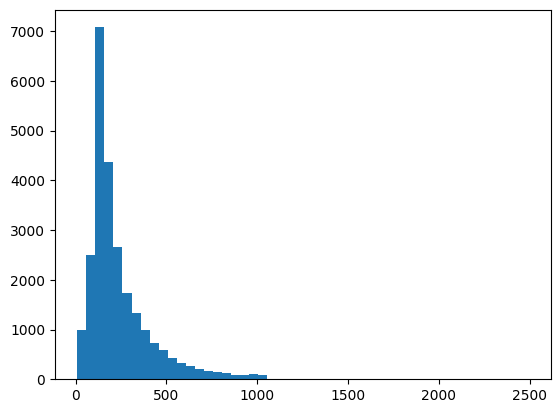

Maximum length of 75% tokenized sequences: 290


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# getting the maximum length of the tokenized sequences
maxlen = max([len(x) for x in train_tokenized])
print("Maximum length of tokenized sequences:", maxlen)

# showing one distribution of the maximun length of tokenized sequences
plt.hist([len(x) for x in train_tokenized], bins=50)
plt.show()

# showing the value for the position at 75% of the distribution
maxlen = int(np.percentile([len(x) for x in train_tokenized], 75))
print("Maximum length of 75% tokenized sequences:", maxlen)

# I will the last value calculated ~ 300, because the real maximun ~ 2500 is making the model training very slow 

In [12]:
from keras.preprocessing.sequence import pad_sequences

# padding the sequences from tokenized data
train_padded = pad_sequences(train_tokenized, maxlen=maxlen)
test_padded  = pad_sequences(test_tokenized,  maxlen=maxlen)

# showing the results
train_padded

array([[   0,    0,    0, ...,  866,  140,    9],
       [   0,    0,    0, ...,   19,   30,   29],
       [   0,    0,    0, ...,  416,    8, 6109],
       ...,
       [ 871,   29,  107, ...,   15,   11,   28],
       [   0,    0,    0, ...,   77, 1289,   22],
       [   2,  733,  706, ...,   31, 1662,  708]])

---
### 3. Building the RNN Model:

- Implement an RNN model using TensorFlow and Keras.

- Define the model architecture, including:

    - Input layer

    - Embedding layer
    
    - RNN layer (use LSTM or GRU for better performance)

    - Fully connected layer

    - Output layer
    
- Compile the model with an appropriate loss function and optimizer.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# defining the RNN Model
input_dim    = len(word_index) + 1  # the size of your tokenizer vocabulary
input_length = maxlen               # the maximum length of the input sequences
output_dim   = 100                  # the size of the embedding vectors

# initiating the model
rnn_model = Sequential()

# defining the Embedding Layer
rnn_model.add(Embedding(input_dim=input_dim, input_length=input_length, output_dim=output_dim))

# defining LSTM Layer
rnn_model.add(LSTM(64))

# defining a Dropout Layer
rnn_model.add(Dropout(0.2))

# defining a Fully Connected Layer
rnn_model.add(Dense(64, activation='relu'))

# defining a Dropout Layer
rnn_model.add(Dropout(0.3))

# defining the Output Layer, using 'sigmoid' because this is a binary classification problem
rnn_model.add(Dense(1, activation='sigmoid')) 

# showing the model summary
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 290, 100)          8858300   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8904765 (33.97 MB)
Trainable params: 89047

In [14]:
from tensorflow.keras.optimizers import Adam

# compiling the model using the 'adam' optimizer and 'binary_crossentropy' loss function
rnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

---
### 4. Training the Model:

- Split the dataset into training and validation sets.

- Train the model on the training set and validate it on the validation set.

- Monitor the training process and use techniques like early stopping if necessary.

In [15]:
from sklearn.model_selection import train_test_split

# splitting the train set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train_padded, df_train['label'], test_size=0.2, random_state=42)

# showing the dimensions of the resulting sets
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_valid:", X_valid.shape)
print("Dimension of y_train:", y_train.shape)
print("Dimension of y_valid:", y_valid.shape)

Dimension of X_train: (20000, 290)
Dimension of X_valid: (5000, 290)
Dimension of y_train: (20000,)
Dimension of y_valid: (5000,)


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# defining one early stopping callback
early_stopping = EarlyStopping(patience=3)

# training the model on the training set
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
313/313 [==============================] - 21573s 69s/step - loss: 0.6631 - accuracy: 0.6104 - val_loss: 0.5037 - val_accuracy: 0.7856
Epoch 2/10
313/313 [==============================] - 72s 230ms/step - loss: 0.3424 - accuracy: 0.8705 - val_loss: 0.3040 - val_accuracy: 0.8748
Epoch 3/10
313/313 [==============================] - 72s 230ms/step - loss: 0.1918 - accuracy: 0.9359 - val_loss: 0.3118 - val_accuracy: 0.8826
Epoch 4/10
313/313 [==============================] - 69s 221ms/step - loss: 0.1150 - accuracy: 0.9642 - val_loss: 0.2857 - val_accuracy: 0.8852
Epoch 5/10
313/313 [==============================] - 78s 250ms/step - loss: 0.0692 - accuracy: 0.9811 - val_loss: 0.3161 - val_accuracy: 0.8796
Epoch 6/10
313/313 [==============================] - 80s 255ms/step - loss: 0.0452 - accuracy: 0.9884 - val_loss: 0.5184 - val_accuracy: 0.8710
Epoch 7/10
313/313 [==============================] - 91s 291ms/step - loss: 0.0300 - accuracy: 0.9934 - val_loss: 0.4540 - val_a

---
### 5. Evaluating the Model:

- Evaluate the model’s performance using appropriate metrics (e.g., accuracy, loss).

- Plot the training and validation loss and accuracy over epochs to visualize the training process.

- Analyze the results and discuss the performance of the RNN.

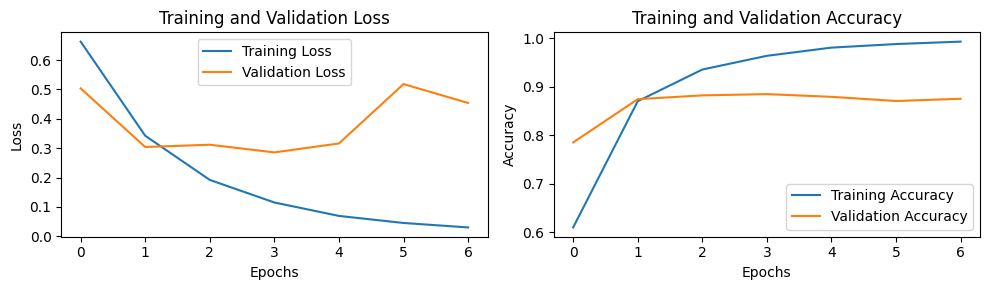

In [17]:
import matplotlib.pyplot as plt

# creating a method to plot the training history
def plot_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Training and Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[1].plot(history.history['accuracy'], label='Training Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Training and Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# plotting the training and validation loss and accuracy over epochs 
plot_history(rnn_history)

In [18]:
# predicting the labels of the validation set
y_pred = (rnn_model.predict(X_valid) > 0.5).astype("int32")

157/157 [==============================] - 9s 51ms/step


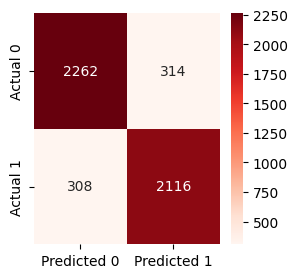

In [19]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# creating a function to plot the confusion matrix
def plot_confusion_matrix(y_actual, y_predic):
    conf_matrix = confusion_matrix(y_actual, y_predic)
    conf_matrix = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    plt.figure(figsize=(3, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')

# showing the confusion matrix
plot_confusion_matrix(y_valid, y_pred)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# creating a function to print the metrics
def print_metrics(model, X_valid, y_valid, y_pred):

    # calculating loss and accuracy
    loss, accuracy = model.evaluate(X_valid, y_valid)

    # getting other metrics
    accuracy  = accuracy_score (y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall    = recall_score   (y_valid, y_pred)
    f1        = f1_score       (y_valid, y_pred)

    # printing the metrics
    print()
    print("Loss:     ", round(loss,     4))
    print("Accuracy: ", round(accuracy, 4))
    print()
    print("Precision:", round(precision,4))
    print("Recall:   ", round(recall,   4))
    print("F1 Score: ", round(f1,       4))

# printing the metrics
print_metrics(rnn_model, X_valid, y_valid, y_pred)

157/157 [==============================] - 8s 50ms/step - loss: 0.4540 - accuracy: 0.8756

Loss:      0.454
Accuracy:  0.8756

Precision: 0.8708
Recall:    0.8729
F1 Score:  0.8719


---
### 6. Hyperparameter Tuning:

- Experiment with different hyperparameters (e.g., number of layers, units in each layer, dropout rate, learning rate) to improve the model’s performance.

- Document the changes and their impact on the model's performance.

I will conduct a series of experiments to rebuild the model and assess potential improvements through subtle modifications:

- Experiment 01: Increase the number of units in the LSTM layer from 64 to 128.
- Experiment 02: Raise the dropout rate from 0.2/0.3 to 0.5.
- Experiment 03: Adjust the learning rate in the Adam optimizer from 0.0001 to 0.00001.

### --- Experiment 01: Increasing the Number of Units in LSTM Layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 290, 100)          8858300   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8983869 (34.27 MB)
Trainable params: 898

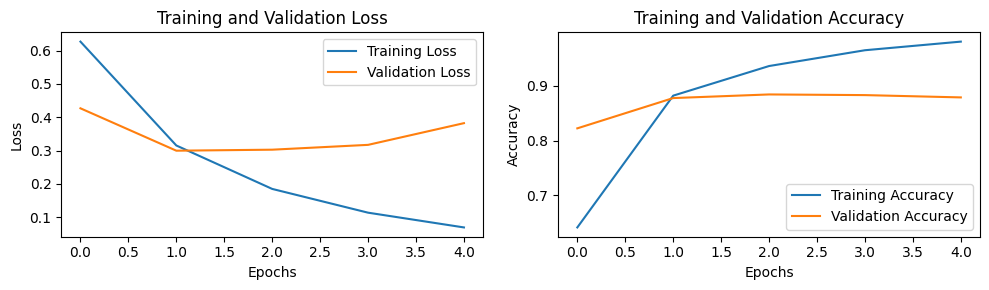

157/157 [==============================] - 9s 59ms/step - loss: 0.3822 - accuracy: 0.8788

Loss:      0.3822
Accuracy:  0.8788

Precision: 0.8624
Recall:    0.8923
F1 Score:  0.8771


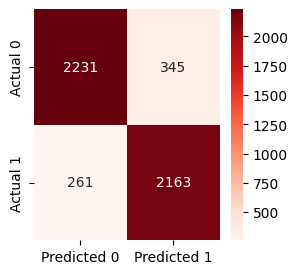

In [21]:
# initiating the model
rnn_model_e01 = Sequential()

# defining the Embedding Layer
rnn_model_e01.add(Embedding(input_dim=input_dim, input_length=input_length, output_dim=output_dim))

# defining LSTM Layer
rnn_model_e01.add(LSTM(128))     # INCREASING FROM 64 TO 128 !!!

# defining a Dropout Layer
rnn_model_e01.add(Dropout(0.2))

# defining a Fully Connected Layer
rnn_model_e01.add(Dense(64, activation='relu'))

# defining a Dropout Layer
rnn_model_e01.add(Dropout(0.3))

# defining the Output Layer, using 'sigmoid' because this is a binary classification problem
rnn_model_e01.add(Dense(1, activation='sigmoid')) 

# showing the model summary
rnn_model_e01.summary()

# --- --- ---

# compiling the model using the 'adam' optimizer and 'binary_crossentropy' loss function
rnn_model_e01.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# training the model on the training set
rnn_history_e01 = rnn_model_e01.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=64, callbacks=[early_stopping])

# plotting the training and validation loss and accuracy over epochs 
plot_history(rnn_history_e01)

# --- --- ---

# predicting the labels of the validation set
y_pred = (rnn_model_e01.predict(X_valid) > 0.5).astype("int32")

# printing the metrics
print_metrics(rnn_model_e01, X_valid, y_valid, y_pred)

# showing the confusion matrix
plot_confusion_matrix(y_valid, y_pred)

### --- Experiment 02: Increasing the Value for Dropout Layer

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 290, 100)          8858300   
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8904765 (33.97 MB)
Trainable params: 890

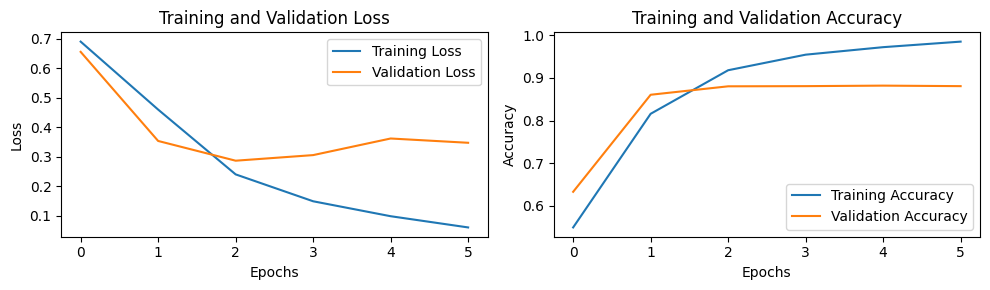

157/157 [==============================] - 6s 37ms/step - loss: 0.3475 - accuracy: 0.8808

Loss:      0.3475
Accuracy:  0.8808

Precision: 0.8668
Recall:    0.8911
F1 Score:  0.8788


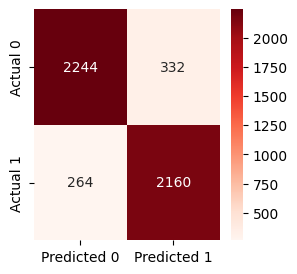

In [22]:
# initiating the model
rnn_model_e02 = Sequential()

# defining the Embedding Layer
rnn_model_e02.add(Embedding(input_dim=input_dim, input_length=input_length, output_dim=output_dim))

# defining LSTM Layer
rnn_model_e02.add(LSTM(64))     

# defining a Dropout Layer
rnn_model_e02.add(Dropout(0.5))     # INCREASING THE VALUE FOR DROPOUT LAYER !!!

# defining a Fully Connected Layer
rnn_model_e02.add(Dense(64, activation='relu'))

# defining a Dropout Layer
rnn_model_e02.add(Dropout(0.5))     # INCREASING THE VALUE FOR DROPOUT LAYER !!!

# defining the Output Layer, using 'sigmoid' because this is a binary classification problem
rnn_model_e02.add(Dense(1, activation='sigmoid')) 

# showing the model summary
rnn_model_e02.summary()

# --- --- ---

# compiling the model using the 'adam' optimizer and 'binary_crossentropy' loss function
rnn_model_e02.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# training the model on the training set
rnn_history_e02 = rnn_model_e02.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=64, callbacks=[early_stopping])

# plotting the training and validation loss and accuracy over epochs 
plot_history(rnn_history_e02)

# --- --- ---

# predicting the labels of the validation set
y_pred = (rnn_model_e02.predict(X_valid) > 0.5).astype("int32")

# printing the metrics
print_metrics(rnn_model_e02, X_valid, y_valid, y_pred)

# showing the confusion matrix
plot_confusion_matrix(y_valid, y_pred)

### --- Experiment 03: Changing the Learning Rate

I was necessary to rerun the script duplicating the epochs from 10 to 20 because resulted not enough to reach one optimal value for loss and accuracy.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 290, 100)          8858300   
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8904765 (33.97 MB)
Trainable params: 890

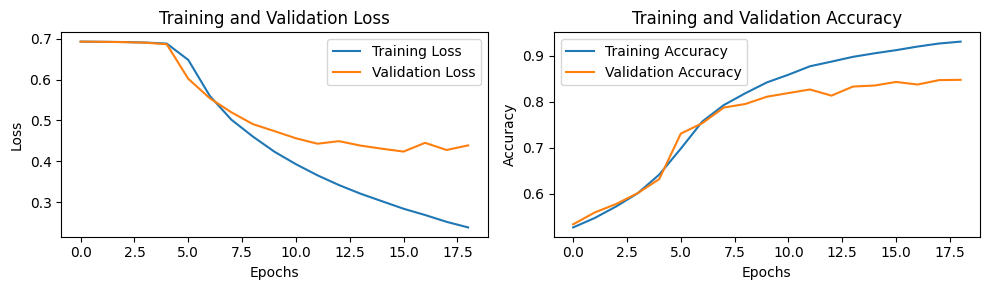

157/157 [==============================] - 6s 38ms/step - loss: 0.4387 - accuracy: 0.8478

Loss:      0.4387
Accuracy:  0.8478

Precision: 0.8249
Recall:    0.8709
F1 Score:  0.8473


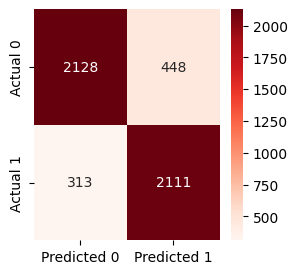

In [25]:
# initiating the model
rnn_model_e03 = Sequential()

# defining the Embedding Layer
rnn_model_e03.add(Embedding(input_dim=input_dim, input_length=input_length, output_dim=output_dim))

# defining LSTM Layer
rnn_model_e03.add(LSTM(64))

# defining a Dropout Layer
rnn_model_e03.add(Dropout(0.2))

# defining a Fully Connected Layer
rnn_model_e03.add(Dense(64, activation='relu'))

# defining a Dropout Layer
rnn_model_e03.add(Dropout(0.3))

# defining the Output Layer, using 'sigmoid' because this is a binary classification problem
rnn_model_e03.add(Dense(1, activation='sigmoid')) 

# showing the model summary
rnn_model_e03.summary()

# --- --- ---

# compiling the model using the 'adam' optimizer and 'binary_crossentropy' loss function
rnn_model_e03.compile(loss='binary_crossentropy', 
                      optimizer=Adam(learning_rate=0.00001),    # CHANGING THE LEARNING RATE !!!
                      metrics=['accuracy'])

# training the model on the training set
rnn_history_e03 = rnn_model_e03.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                                    epochs=20,                  # INCREASING THE NUMBER OF EPOCHS !!! 
                                    batch_size=64, callbacks=[early_stopping])

# plotting the training and validation loss and accuracy over epochs 
plot_history(rnn_history_e03)

# --- --- ---

# predicting the labels of the validation set
y_pred = (rnn_model_e03.predict(X_valid) > 0.5).astype("int32")

# printing the metrics
print_metrics(rnn_model_e03, X_valid, y_valid, y_pred)

# showing the confusion matrix
plot_confusion_matrix(y_valid, y_pred)

---
### 7. Comparative Analysis:

- Implement another neural network architecture (e.g., a simple feedforward neural network) for the same task.

- Compare the performance of the RNN with this alternative model.

- Discuss the strengths and weaknesses of each approach based on your findings.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 290, 100)          8858300   
                                                                 
 flatten (Flatten)           (None, 29000)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1856064   
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

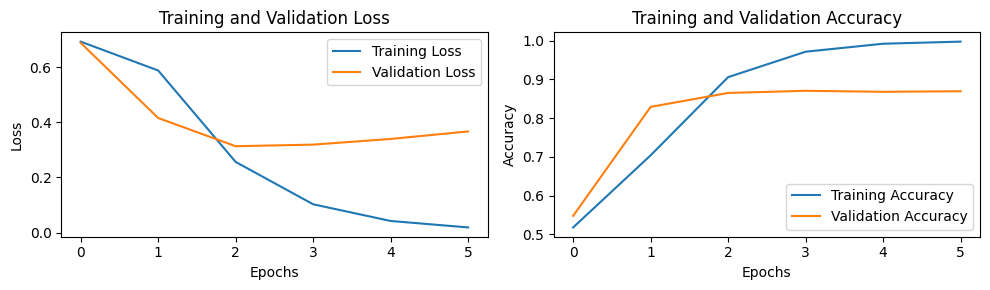

157/157 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8696

Loss:      0.3668
Accuracy:  0.8696

Precision: 0.8519
Recall:    0.8849
F1 Score:  0.8681


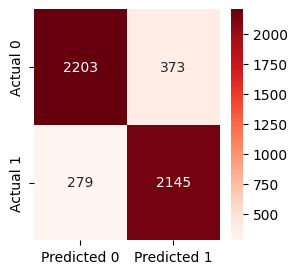

In [24]:
from tensorflow.keras.layers import Flatten

# defining the FNN Model
fnn_model = Sequential()

# defining the Embedding Layer
fnn_model.add(Embedding(input_dim=input_dim, input_length=input_length, output_dim=output_dim))

# flattening the input
fnn_model.add(Flatten())    # USING FNN MODEL !!!

# defining a Fully Connected Layer
fnn_model.add(Dense(64, activation='relu'))

# defining a Dropout Layer
fnn_model.add(Dropout(0.2))

# defining another Fully Connected Layer
fnn_model.add(Dense(64, activation='relu'))

# defining a Dropout Layer
fnn_model.add(Dropout(0.3))

# defining the Output Layer, using 'sigmoid' because this is a binary classification problem
fnn_model.add(Dense(1, activation='sigmoid')) 

# showing the model summary
fnn_model.summary()

# --- --- ---

# compiling the model using the 'adam' optimizer and 'binary_crossentropy' loss function
fnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# training the model on the training set
fnn_history = fnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=64, callbacks=[early_stopping])

# plotting the training and validation loss and accuracy over epochs 
plot_history(fnn_history)

# --- --- ---

# predicting the labels of the validation set
y_pred = (fnn_model.predict(X_valid) > 0.5).astype("int32")

# printing the metrics
print_metrics(fnn_model, X_valid, y_valid, y_pred)

# showing the confusion matrix
plot_confusion_matrix(y_valid, y_pred)

### Comparing and Reflecting on the Results of the 5 Cases

In general, I believe the model I developed is not performing very well. The accuracy in all cases doesn't exceed 0.87, and the loss never drops below 0.34. If you look at the plots of loss and accuracy over epochs for the validation set, you'll notice that at some points, both metrics diverge significantly from those obtained for the training set, indicating that the model is overfitting.

It's clear that I’m not doing something right, likely due to my lack of experience in this area. However, it’s certain that the best model among the five options is RNN Scenario 02, where the dropout layers were increased to 0.5. But even then, the improvement is only slightly better than the others.

So the question now is, how can I improve the model? Any suggestions for further testing would be appreciated.